# Guia 2

## Ejercicio 1

Implemente el algorítmo de retropropagación para un perceptrón multicapa de forma que se pueda elegir libremente la cantidad de capas de la red y de neuronas en cada capa. Pruébelo entrenando una red de estructura apropiada para resolver el problema `XOR`, con sus particione de entrenamiento y prueba correspondientes (datos de la Guía de Trabajos Prácticos 1).

### Solucion

Los pasos para ajustar son:
- Prograpar entrada para calcular salida
- Calcular error
- Propagar patras calculando los deltas de cada neurona

Modelacion:
- Modelar cada capa como
    - un vector columna de entradas
    - una matriz de pesos
    - calculará el vector de salidas a partir de un vector de entradas y la matriz de pesos
    - Hay que agregarle noma el peso del bias

Bucle de entrenamiento:
    - forward: multiplicar la matriz de pesos por las entradas, te da la salida, que la usa la siguiente capa, etc. De aca sacamos los vectores de salida de cada capa
    - backward: calcular el delta de cada capa, desde la capa de salida pa'tras. De aca sacamos los vectores delta de cada capa.
    - actualizacion

error de training: 0.2535


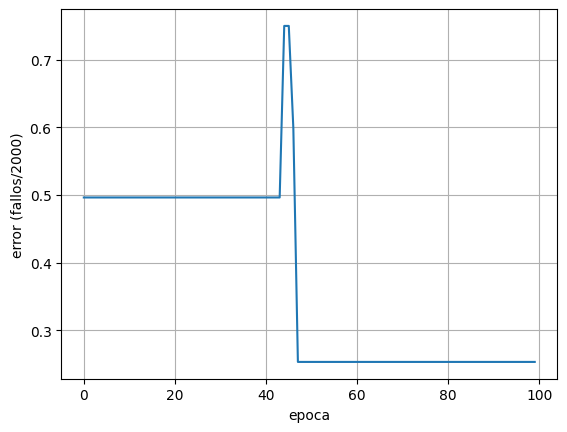

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import PerceptronMulticapa

def cargarCSV(csvRelativePath, delimeter = ',') -> np.ndarray[any]:
    this_folder = os.path.abspath('') 
    fullPath = os.path.join(this_folder, csvRelativePath)
    return np.loadtxt(fullPath, dtype=float, delimiter=delimeter)

# ===== TRAINING =====
# leer archivos
trainFileXOR = cargarCSV('./data/XOR_trn.csv')
x = trainFileXOR[:,:-1]
yd = trainFileXOR[:,-1]

NNXOR = PerceptronMulticapa.PerceptronMulticapa(
    cant_entradas=x.shape[1],
    capas=[2,1],
    max_epocas=100,
    tasa_aprendizaje=0.01
)

trnErr = NNXOR.entrenar(
    x=x,
    yd=yd,
    targetError=0.1
)

print(f"error de training: {trnErr}")

# Gráficas
plt.grid()
plt.plot(NNXOR.error_history)
plt.xlabel('epoca')

# Gráfica del error
plt.ylabel(f"error (fallos/{x.shape[0]})")

# Gráfica de la tasa de desaciertos

# Comparación con distintas tasas de aprendizaje

# Comparación con distinto arquitectura [1,1] (una entrada, una neurona oculta, una salida)

plt.show()